In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'E:\\Programming\\AdvRegressionGitPull\\AdvancedHousingPricesRegression'

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.shape

(1460, 81)

Data Analysis will cover the following:
1. Missing Values
2. Numeric Variables
3. Distribution of numeric variables
4. Categorical variables
5. Cardinality of categorical variables
6. Outliers
7. Relationship with dependent variable

### Missing values analysis(Will only analyze, not edit the dataset)

In [8]:
featureWnullVar =[]
for feature in df.columns:
    if df[feature].isnull().sum()> 0 :
        featureWnullVar.append(feature)
        print(feature, " ", (np.round(df[feature].isnull().mean(), 4))*100, " % missing")

LotFrontage   17.740000000000002  % missing
Alley   93.77  % missing
MasVnrType   0.5499999999999999  % missing
MasVnrArea   0.5499999999999999  % missing
BsmtQual   2.53  % missing
BsmtCond   2.53  % missing
BsmtExposure   2.6  % missing
BsmtFinType1   2.53  % missing
BsmtFinType2   2.6  % missing
Electrical   0.06999999999999999  % missing
FireplaceQu   47.260000000000005  % missing
GarageType   5.55  % missing
GarageYrBlt   5.55  % missing
GarageFinish   5.55  % missing
GarageQual   5.55  % missing
GarageCond   5.55  % missing
PoolQC   99.52  % missing
Fence   80.75  % missing
MiscFeature   96.3  % missing


Plenty of columns with missing values. We can safely delete features which have more than 15-20% missing data. But before deleting them, we need to check if the missing values have any relationship with the dependent feature(SalePrice). Let us verify that with a few visualizations

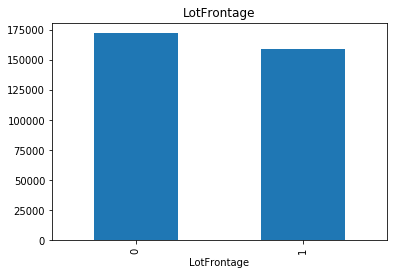

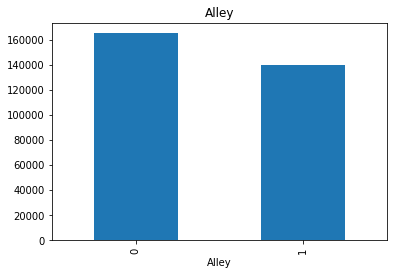

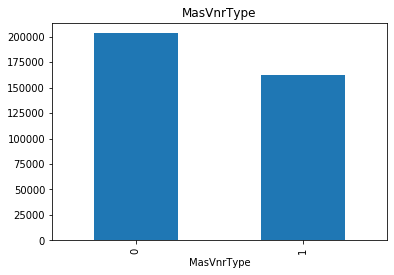

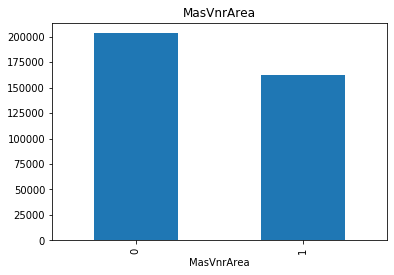

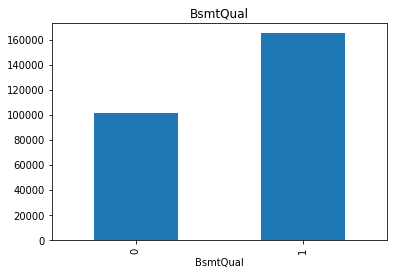

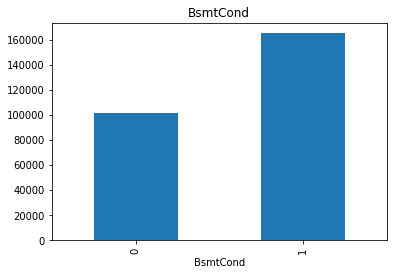

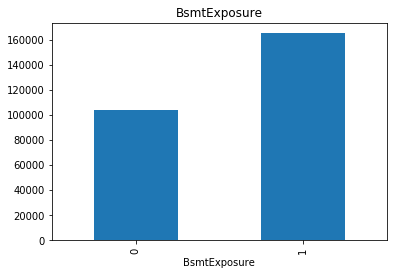

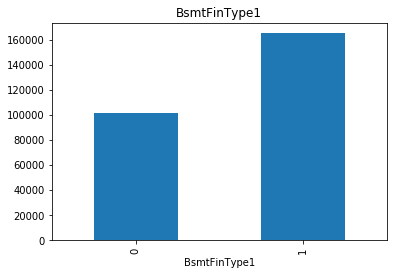

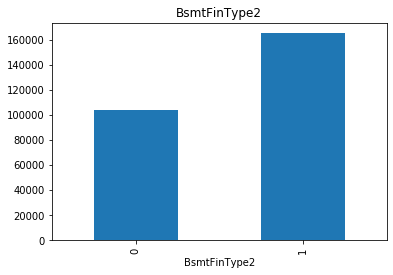

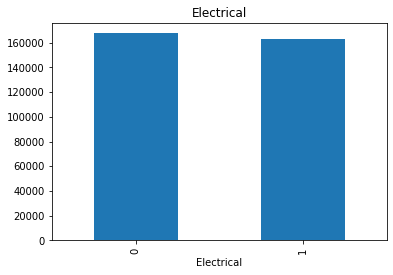

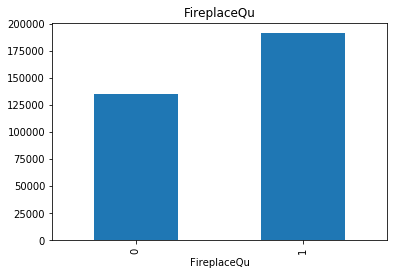

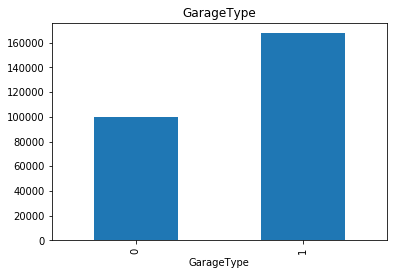

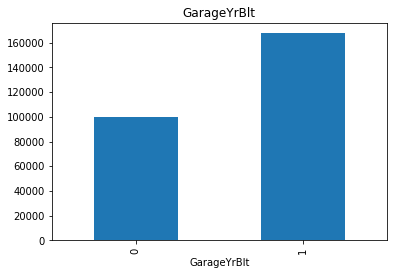

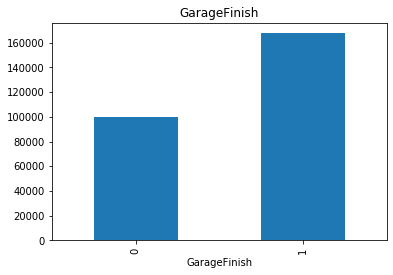

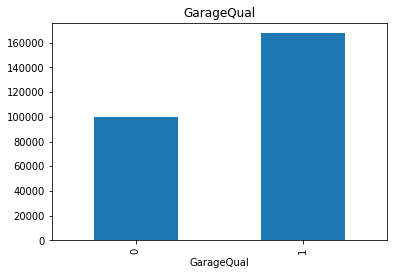

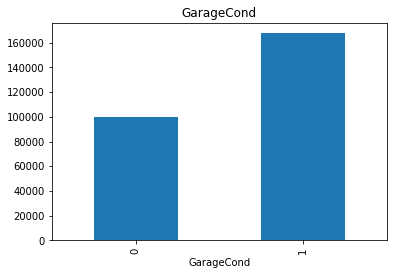

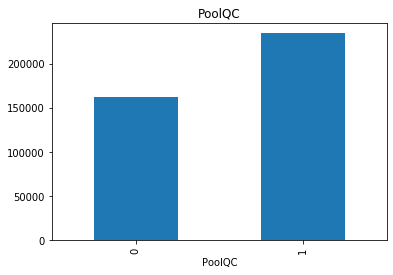

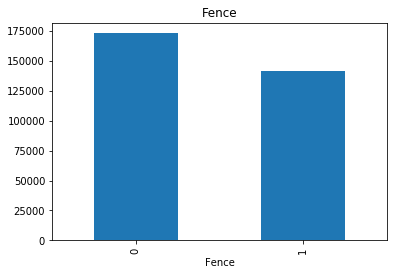

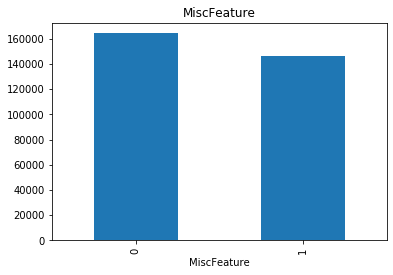

In [9]:
for feature in featureWnullVar:
    temp = df.copy()
    
    # We now convert the feature variables into binary 0 and 1 and plot it against the sale price
    temp[feature] = np.where(df[feature].isnull(),0,1)
    
    #Plot the features against the sale price
    temp.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

We see that in a few features, the NaN values account for a higher median cost(Lot footage) and in others, account for a lower median cost(BsmtQual). We will deal with these later.

### Numeric Variables

In [10]:
numFeatures =[]
catFeatures=[]
for features in df.columns:
    if df[features].dtype != 'O':
        numFeatures.append(features)
    else:
        catFeatures.append(features)

print(len(numFeatures))
df[catFeatures].head()

38


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


We now have 38 numeric features. But we also see that it includes Datetime features. We also have feature Id which we need to check is more of a primary key for the dataset and not required or is capable of any potential insight.

In [11]:
# Let us analyze the year data features. By eyeballing the data, we notice 4 such features. We will create another temp df for these.
yrfeatures =[]
for feature in numFeatures:
    if 'Yr' in feature or 'Year' in feature:
        yrfeatures.append(feature)
print(yrfeatures)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [12]:
df[yrfeatures].nunique()


YearBuilt       112
YearRemodAdd     61
GarageYrBlt      97
YrSold            5
dtype: int64

Text(0, 0.5, 'Median House Cost')

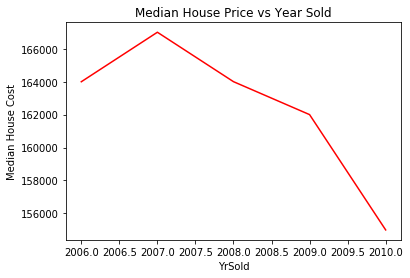

In [13]:
# Analyze year sold vs sale price
df.groupby('YrSold')['SalePrice'].median().plot(color='r')
plt.title('Median House Price vs Year Sold')
plt.ylabel('Median House Cost')

We see that the house prices hit a peak in 2007 and fall after that. This co-incides with the 2008 housing bubble. Let us also analyze the sale price by the age of the house of the time it took for the remodel

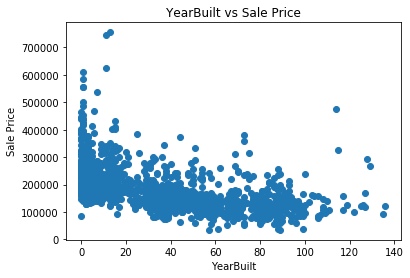

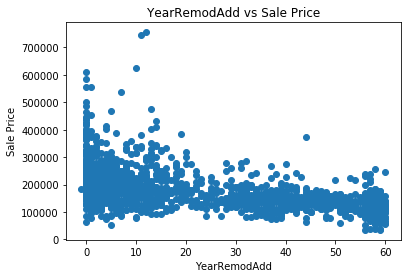

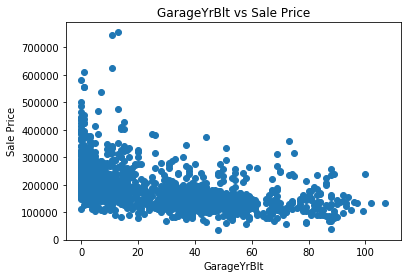

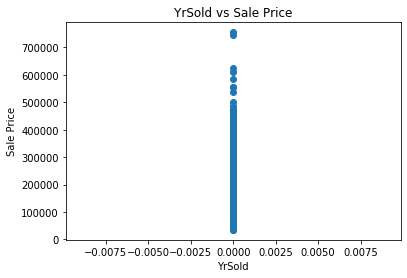

In [14]:
for feat in yrfeatures:
        temp[feat] = df['YrSold']-df[feat]
        plt.scatter(temp[feat], df['SalePrice'])
        plt.ylabel('Sale Price')
        plt.xlabel(feat)
        plt.title(feat + " vs Sale Price")
        plt.show()

We see the close the house selling year is to the built year or remodel, the higher the median price tends to be.(Last graph can be ignored)

In [15]:
for features in numFeatures:
        print(features, " ", df[features].nunique())

Id   1460
MSSubClass   15
LotFrontage   110
LotArea   1073
OverallQual   10
OverallCond   9
YearBuilt   112
YearRemodAdd   61
MasVnrArea   327
BsmtFinSF1   637
BsmtFinSF2   144
BsmtUnfSF   780
TotalBsmtSF   721
1stFlrSF   753
2ndFlrSF   417
LowQualFinSF   24
GrLivArea   861
BsmtFullBath   4
BsmtHalfBath   3
FullBath   4
HalfBath   3
BedroomAbvGr   8
KitchenAbvGr   4
TotRmsAbvGrd   12
Fireplaces   4
GarageYrBlt   97
GarageCars   5
GarageArea   441
WoodDeckSF   274
OpenPorchSF   202
EnclosedPorch   120
3SsnPorch   20
ScreenPorch   76
PoolArea   8
MiscVal   21
MoSold   12
YrSold   5
SalePrice   663


We observe the unique values and set a threshold of  below 25 for discrete features and above 25 for continous. We shall exclude year data and Id from these

In [16]:
discreteFeatures=[]
continousFeatures=[]
for feature in numFeatures:
    if df[feature].nunique()<25 and feature not in yrfeatures+['Id']:
        discreteFeatures.append(feature)
    elif df[feature].nunique()>=25 and feature not in yrfeatures+['Id']:
        continousFeatures.append(feature)
        

In [17]:
len(discreteFeatures)

17

In [18]:
len(continousFeatures)

16

In [19]:
len(numFeatures)

38

Checks out. 17+16=33. 4 year variables, 1 Id var. Total 38

In [20]:
df[discreteFeatures].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


Analyze discrete variables vs sale price

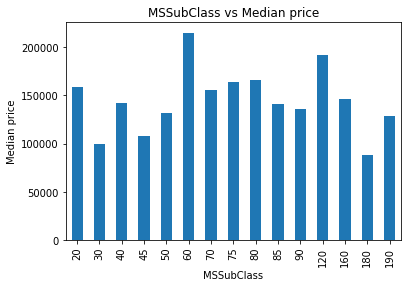

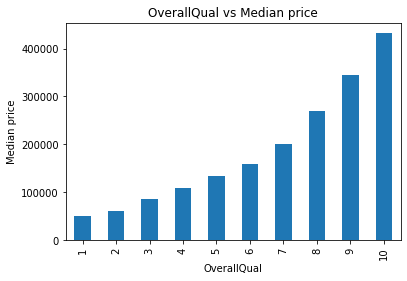

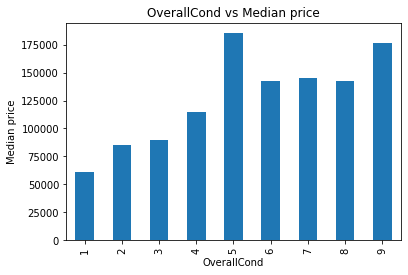

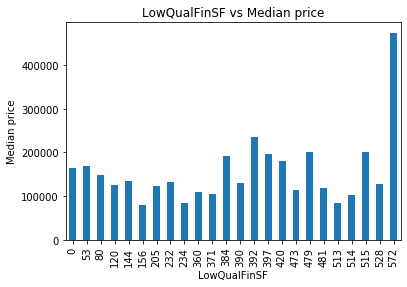

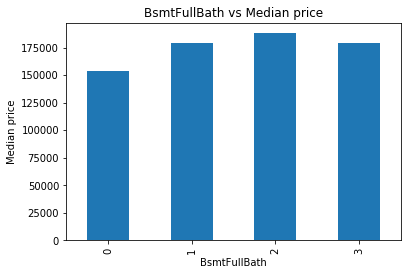

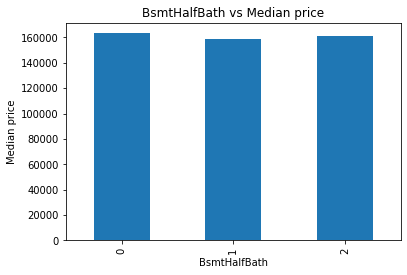

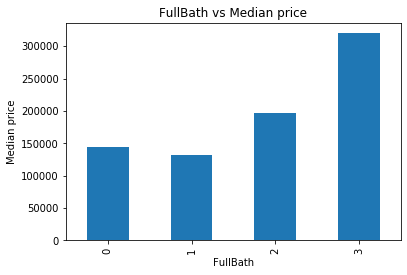

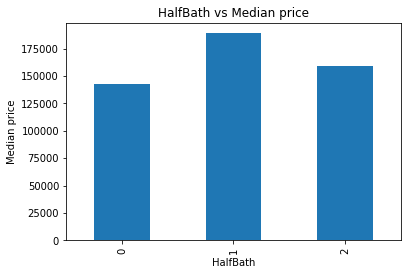

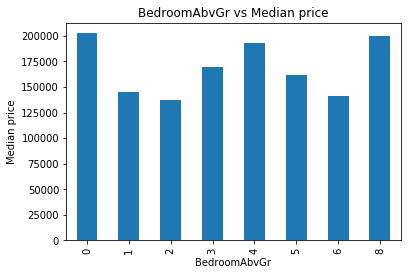

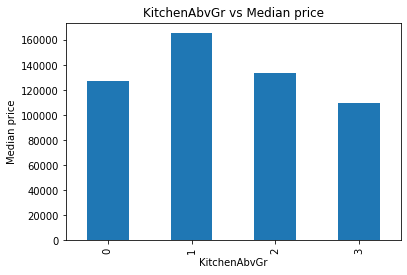

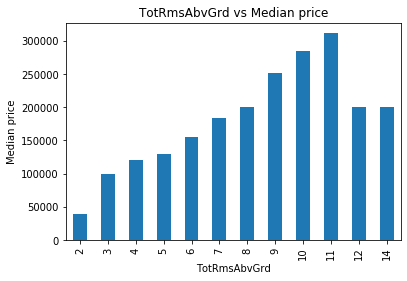

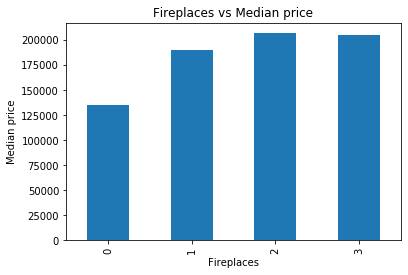

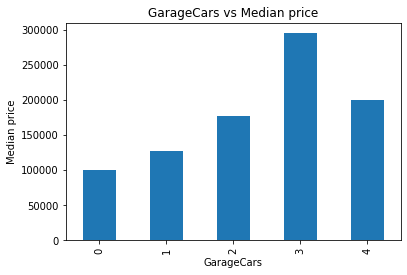

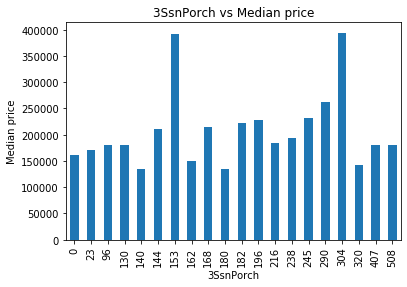

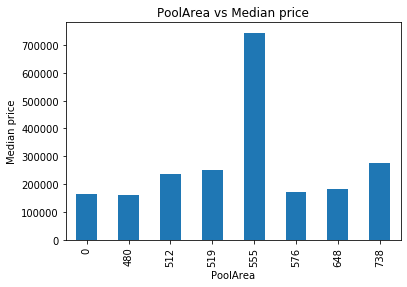

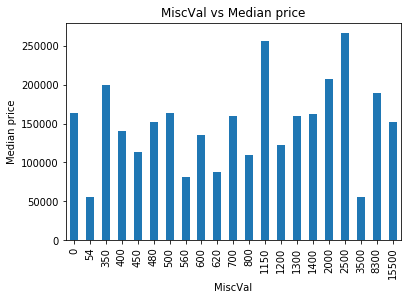

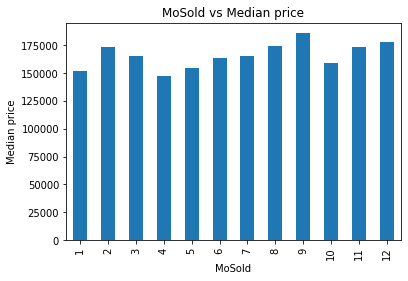

In [21]:
for feature in discreteFeatures:
    temp = df.copy()
    temp.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('Median price')
    plt.title(feature + " vs Median price")
    plt.show()

Plenty of realtionships ovserved in the visualizations. Some exponential graphs(OverallQual, FullBath, TotRmsAbvGrd) and outliers(pool areas)

Continous variables analysis

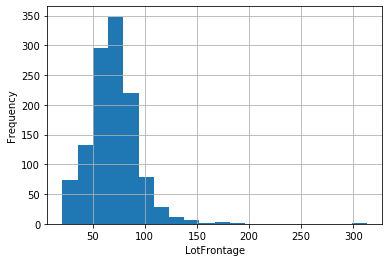

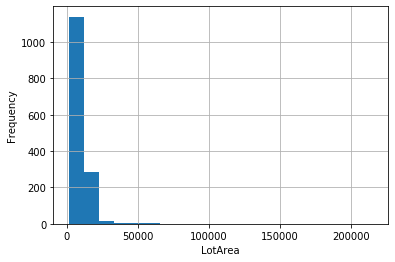

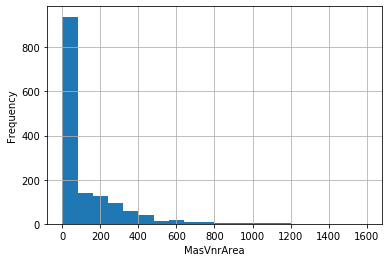

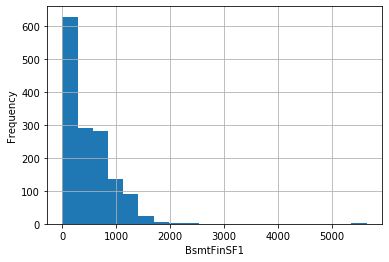

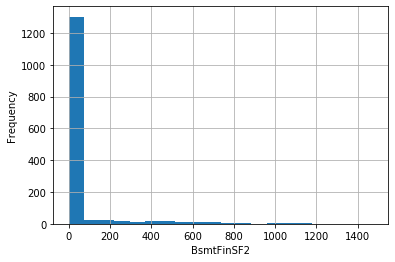

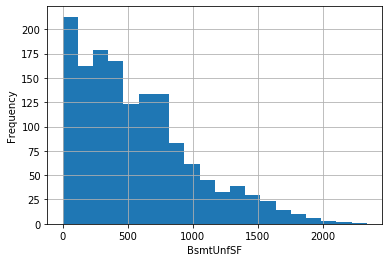

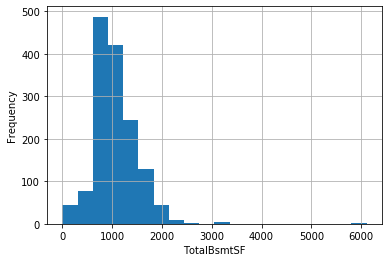

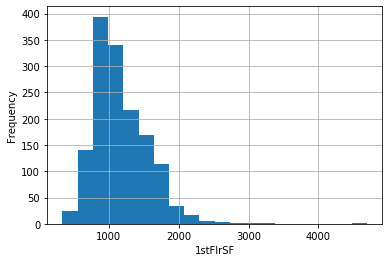

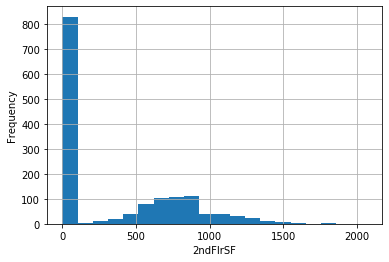

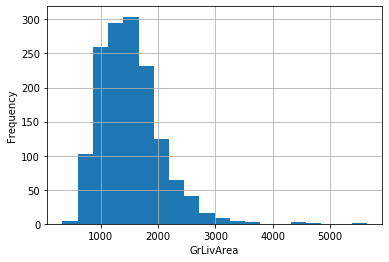

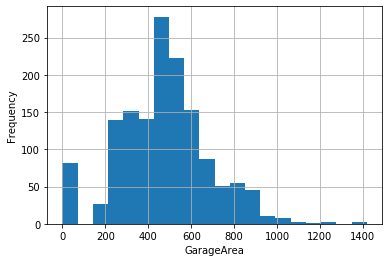

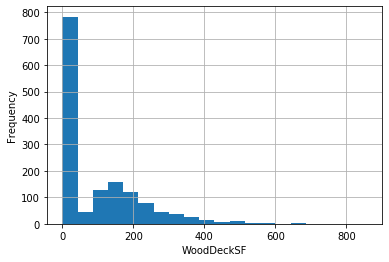

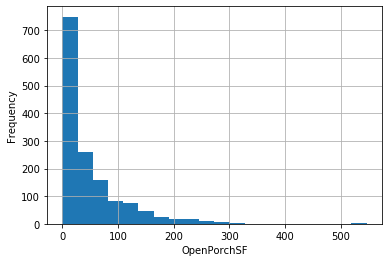

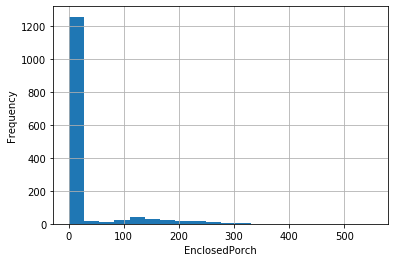

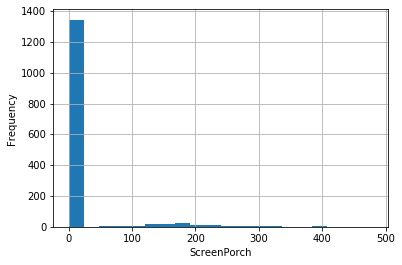

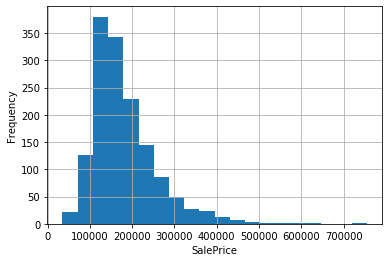

In [22]:
for feature in continousFeatures:
    temp = df.copy()
    temp[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

We see that the many of the features are not distributed normally and is skewed. We can apply log transformations to try to get it to more of a normal distrubution.

In [23]:
### Outliers

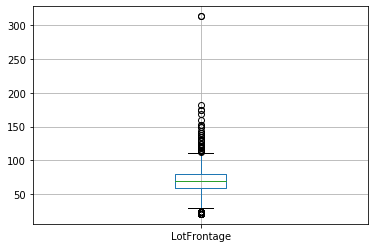

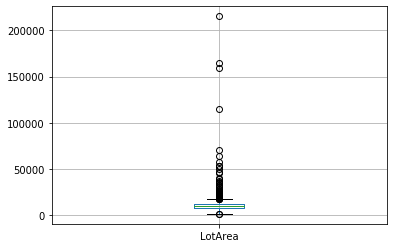

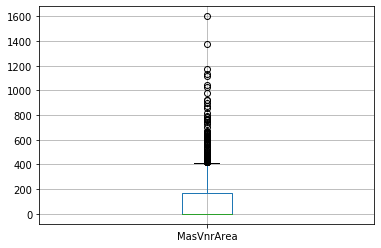

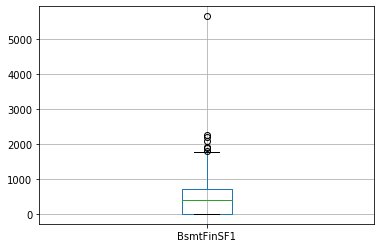

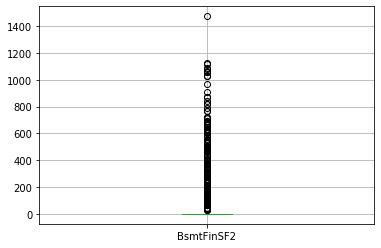

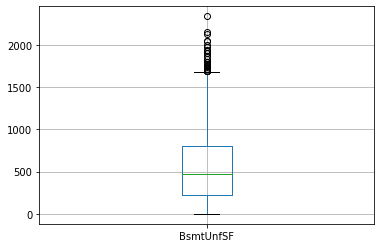

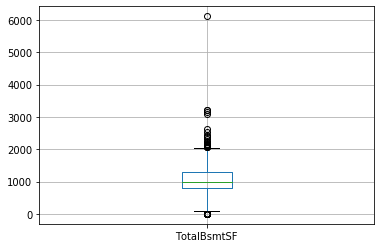

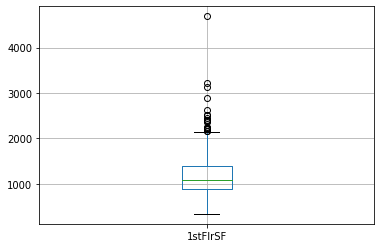

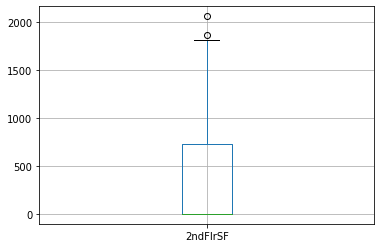

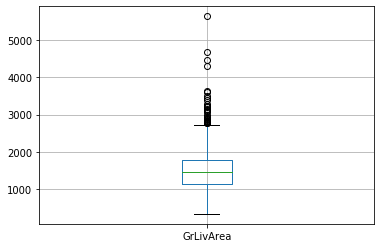

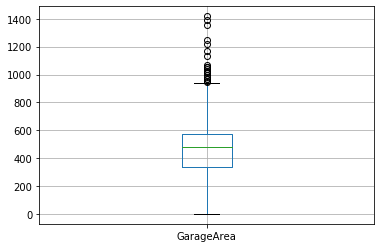

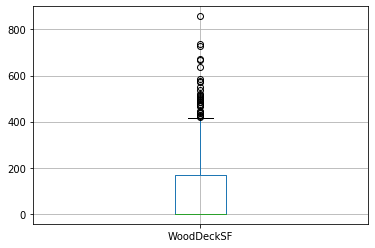

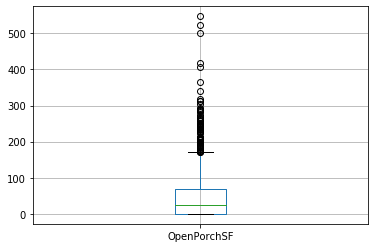

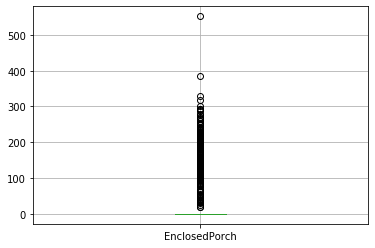

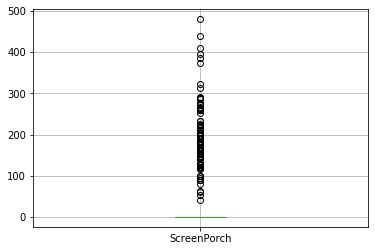

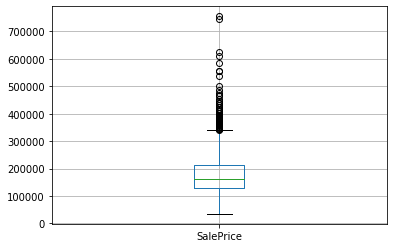

In [24]:
for feat in continousFeatures:
    df.boxplot(column=feat)
    plt.show()

As we see the box plots, there are plenty of outliers. We need to check if they exist even after applying the log transformations.

### Categorical Variables

Let us see the columns with the categorical features.( We separated numeric and categorical features in the previous steps. Check numerical features analysis)

In [25]:
catFeatures

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
for feat in catFeatures:
    print( feat, ': {} categories'.format(df[feat].nunique()))

MSZoning : 5 categories
Street : 2 categories
Alley : 2 categories
LotShape : 4 categories
LandContour : 4 categories
Utilities : 2 categories
LotConfig : 5 categories
LandSlope : 3 categories
Neighborhood : 25 categories
Condition1 : 9 categories
Condition2 : 8 categories
BldgType : 5 categories
HouseStyle : 8 categories
RoofStyle : 6 categories
RoofMatl : 8 categories
Exterior1st : 15 categories
Exterior2nd : 16 categories
MasVnrType : 4 categories
ExterQual : 4 categories
ExterCond : 5 categories
Foundation : 6 categories
BsmtQual : 4 categories
BsmtCond : 4 categories
BsmtExposure : 4 categories
BsmtFinType1 : 6 categories
BsmtFinType2 : 6 categories
Heating : 6 categories
HeatingQC : 5 categories
CentralAir : 2 categories
Electrical : 5 categories
KitchenQual : 4 categories
Functional : 7 categories
FireplaceQu : 5 categories
GarageType : 6 categories
GarageFinish : 3 categories
GarageQual : 5 categories
GarageCond : 5 categories
PavedDrive : 3 categories
PoolQC : 3 categories
Fen

Analyze relationship between categorical feature and dependent feature

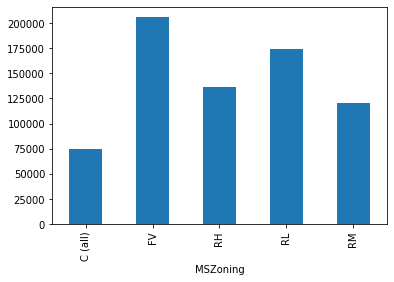

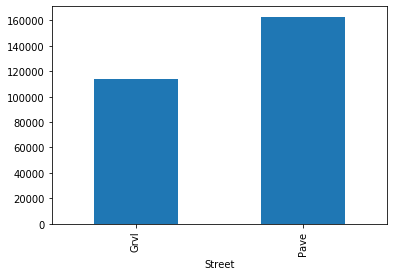

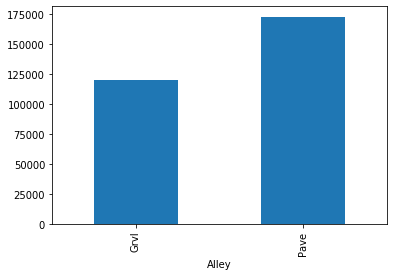

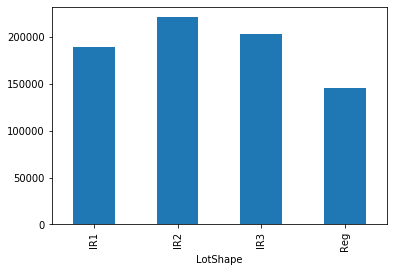

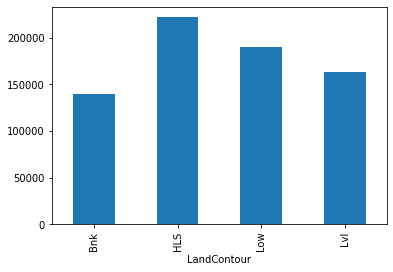

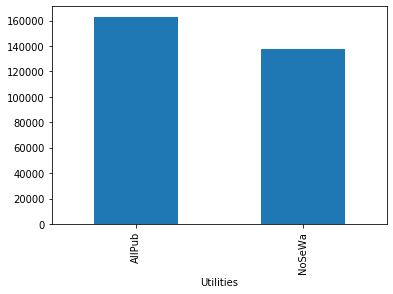

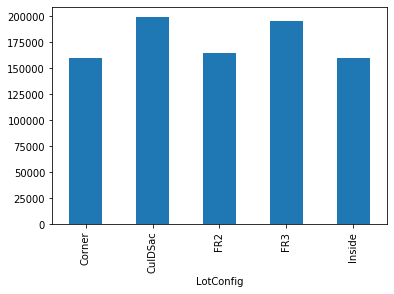

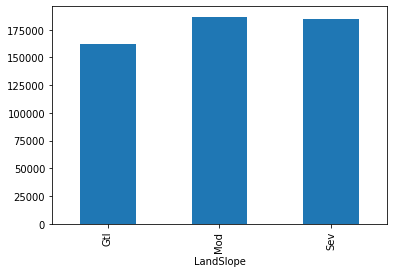

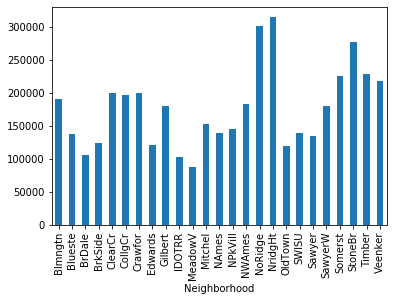

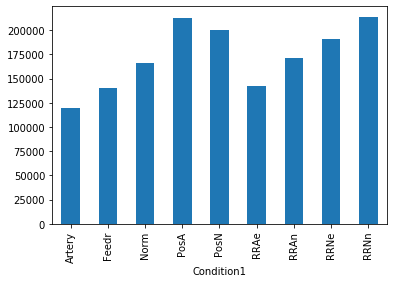

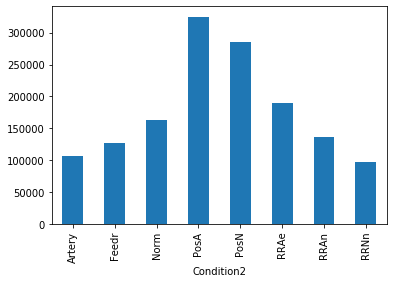

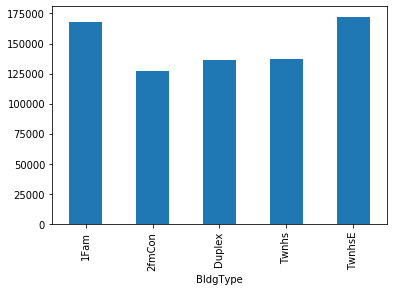

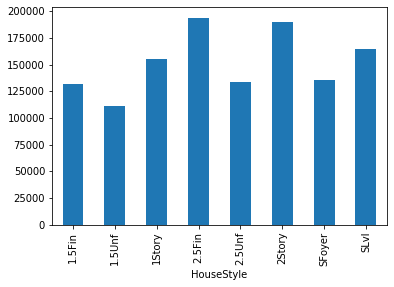

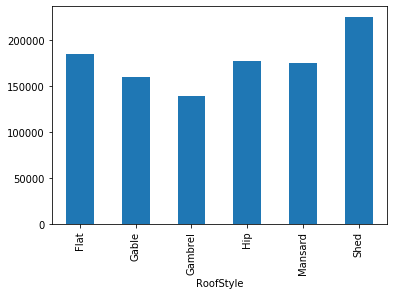

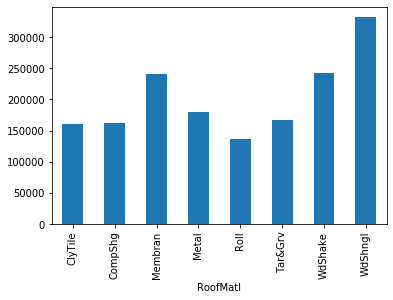

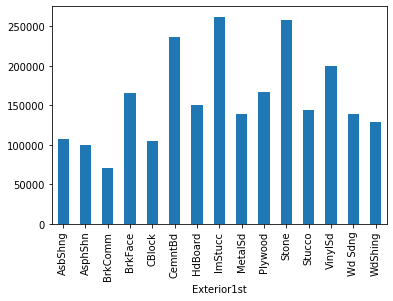

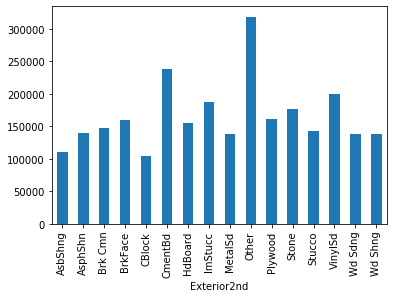

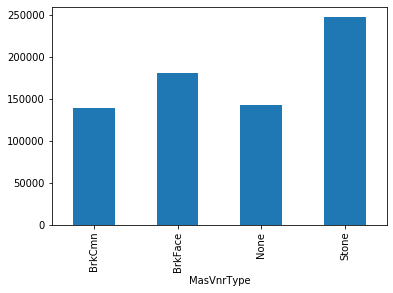

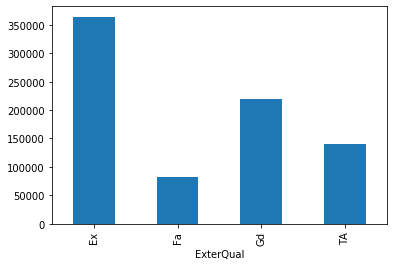

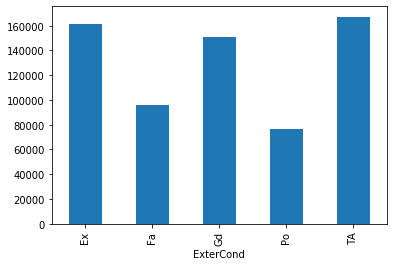

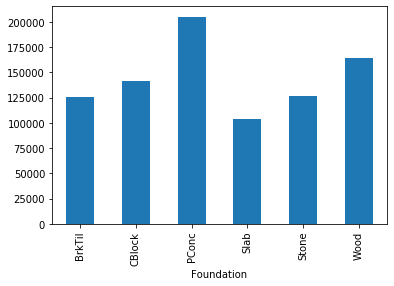

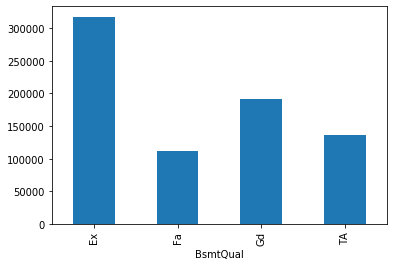

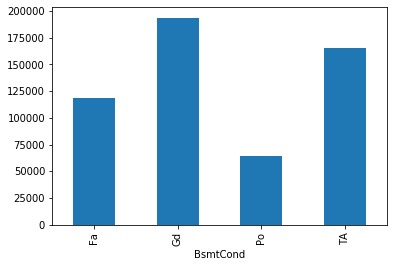

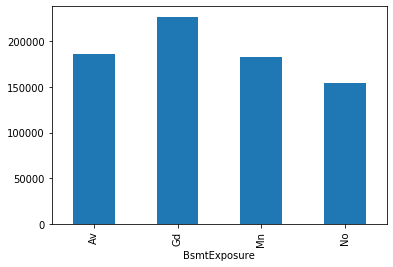

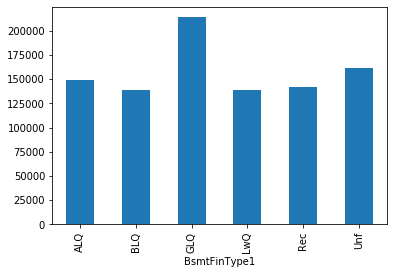

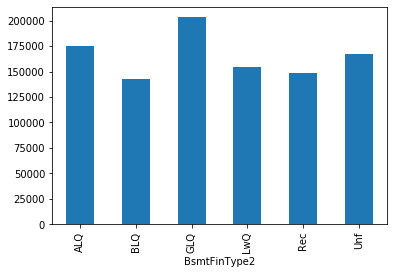

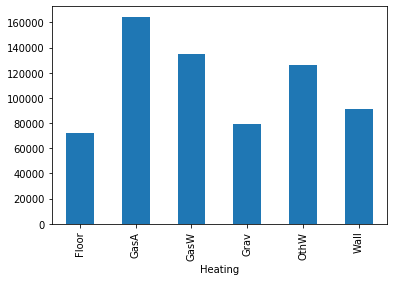

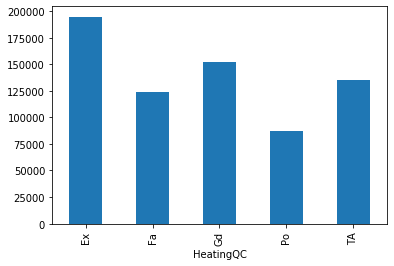

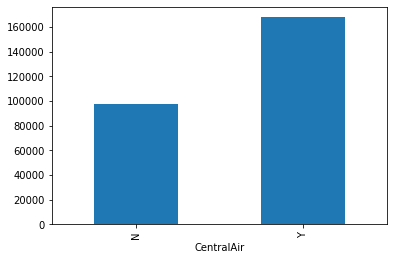

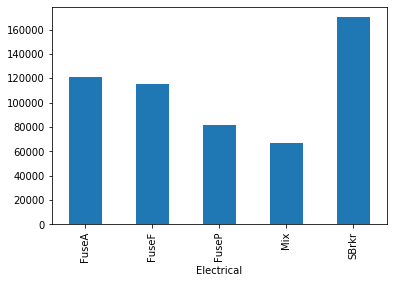

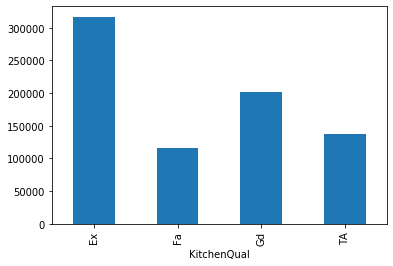

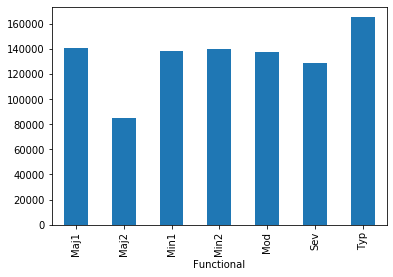

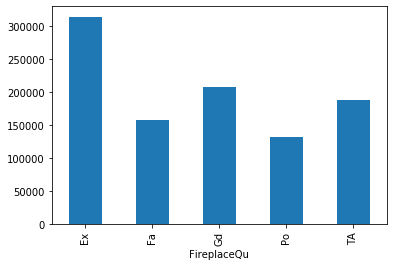

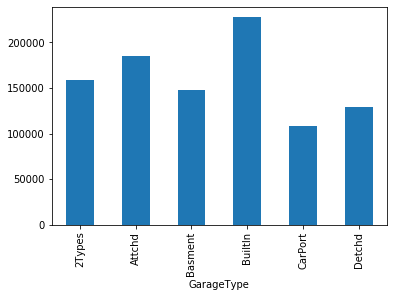

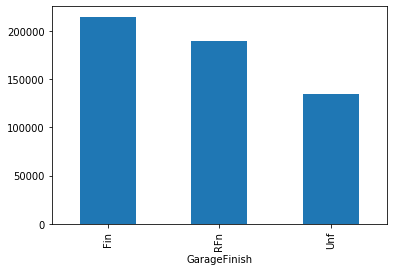

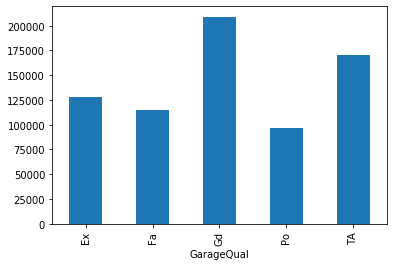

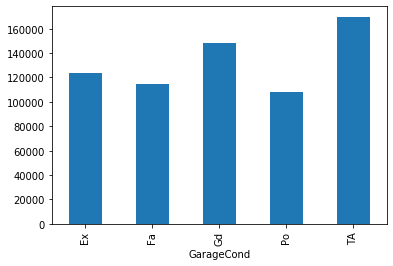

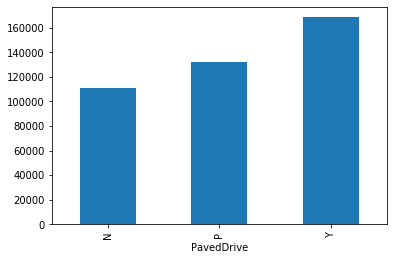

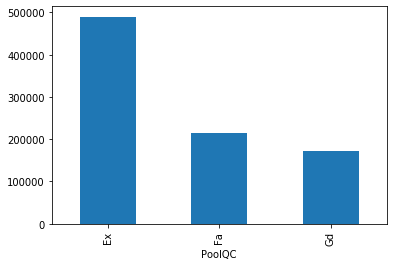

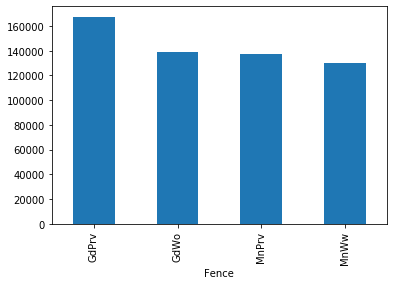

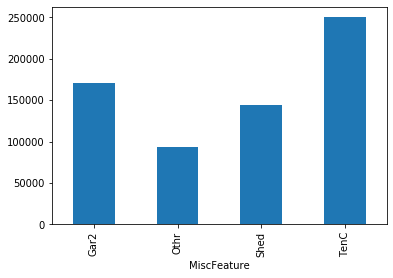

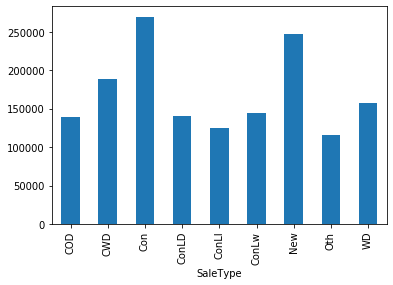

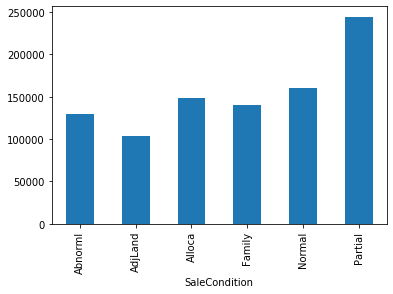

In [27]:
for feat in catFeatures:
    df.groupby(feat)['SalePrice'].median().plot(kind='bar')
    plt.show()

We see that are a few categories which correlate to the sales price

# Feature Engineering

## Missing Values

### Categorical Values : Here we replace the missing values with "Missing" and handle them further through encoding to convert them to numerical values

In [28]:
nullCatFeat = []
for feat in catFeatures:
    if df[feat].isnull().sum()>0:
        nullCatFeat.append(feat)
        print(feat, ": {} % null values".format((df[feat].isnull().mean() *100)))

Alley : 93.76712328767123 % null values
MasVnrType : 0.547945205479452 % null values
BsmtQual : 2.5342465753424657 % null values
BsmtCond : 2.5342465753424657 % null values
BsmtExposure : 2.6027397260273974 % null values
BsmtFinType1 : 2.5342465753424657 % null values
BsmtFinType2 : 2.6027397260273974 % null values
Electrical : 0.0684931506849315 % null values
FireplaceQu : 47.26027397260274 % null values
GarageType : 5.5479452054794525 % null values
GarageFinish : 5.5479452054794525 % null values
GarageQual : 5.5479452054794525 % null values
GarageCond : 5.5479452054794525 % null values
PoolQC : 99.52054794520548 % null values
Fence : 80.75342465753424 % null values
MiscFeature : 96.30136986301369 % null values


In [29]:
# Function to replace Null values with 'Missing'
def repCatNull(df,nullCatFeat):
    return df[nullCatFeat].fillna('Missing')
        

In [30]:
df[nullCatFeat] = repCatNull(df,nullCatFeat)

In [31]:
df[nullCatFeat].isnull().sum()
   # Verify if null values are present or successfully replaced
        

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [32]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


We have now replaced all missing categorical values

### Numerical Features

In [33]:
# Only numeric features will NULL will show as we have taken care of the categorical values in the previous step
numNan =[]
for feat in featureWnullVar:
    if df[feat].isnull().sum()>0:
        print(feat, ": {} % values missing".format(df[feat].isnull().mean()*100))
        numNan.append(feat)
        
numNan

LotFrontage : 17.73972602739726 % values missing
MasVnrArea : 0.547945205479452 % values missing
GarageYrBlt : 5.5479452054794525 % values missing


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Since there were plenty of outliers, we will replace the values with the median. We will also record the row as replaced by median by creating another row_naFilledStatus with 1 for na values and 0 for the rest.

In [34]:
for feat in numNan:
    median = df[feat].median()
    print(median)
    df[feat+'_naFill'] = np.where(df[feat].isnull(),1,0)
    df[feat].fillna(median, inplace=True)


69.0
0.0
1980.0


In [35]:
df.isnull().sum()

Id                    0
MSSubClass            0
MSZoning              0
LotFrontage           0
LotArea               0
                     ..
SaleCondition         0
SalePrice             0
LotFrontage_naFill    0
MasVnrArea_naFill     0
GarageYrBlt_naFill    0
Length: 84, dtype: int64

No null values present anymore

In [36]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_naFill,MasVnrArea_naFill,GarageYrBlt_naFill
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0

### Convert year features into integers. Replaced year values by difference from the year sold.

In [37]:
yrfeatures

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [38]:
for feat in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feat] = df['YrSold']-df[feat]

In [39]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_naFill,MasVnrArea_naFill,GarageYrBlt_naFill
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


### Handling Skewed Features

In [41]:
numFeatures

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

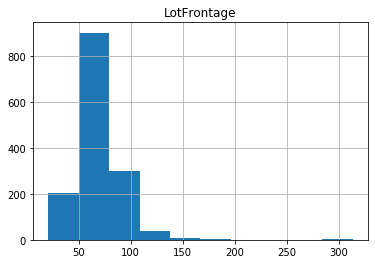

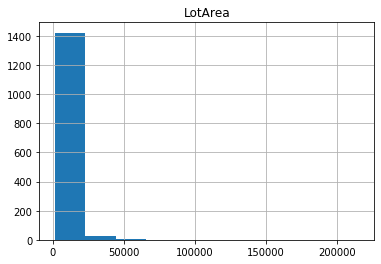

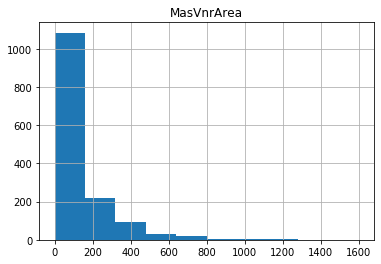

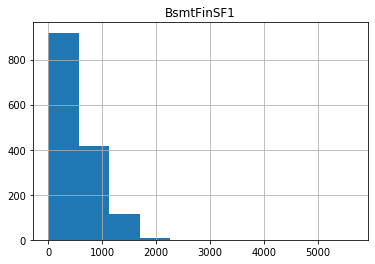

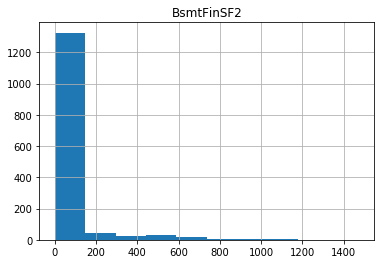

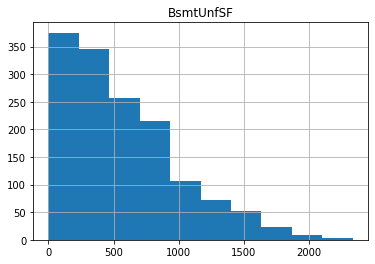

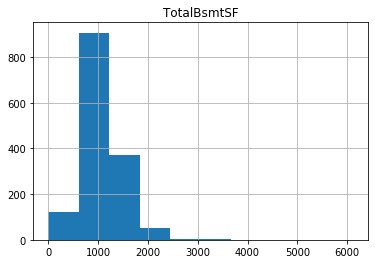

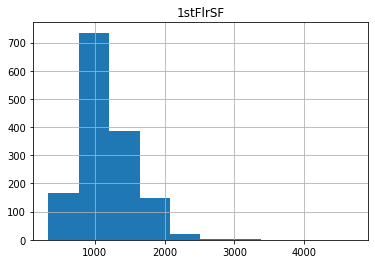

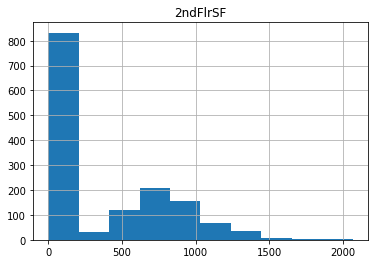

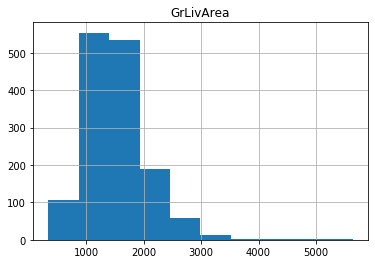

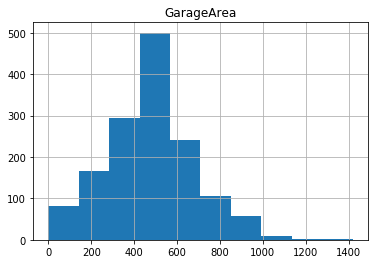

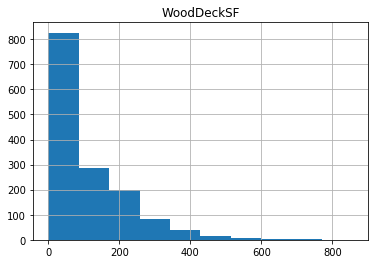

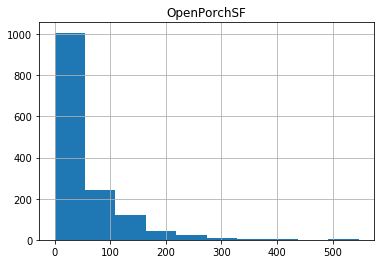

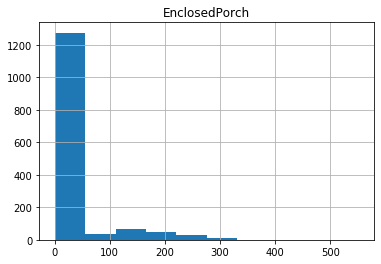

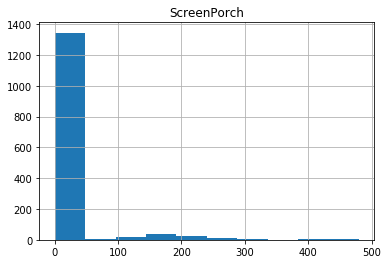

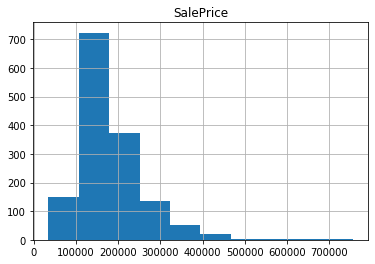

In [42]:
for feat in continousFeatures:
    df[feat].hist()
    plt.title(feat)
    plt.show()

Applying Log transformations:

In [43]:
df3 = df.copy()

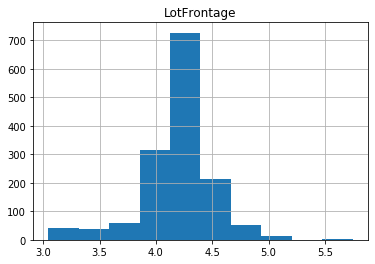

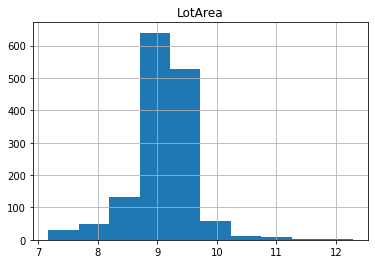

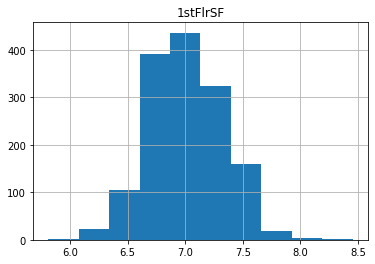

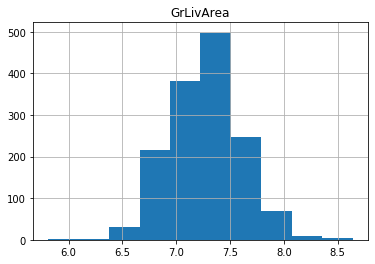

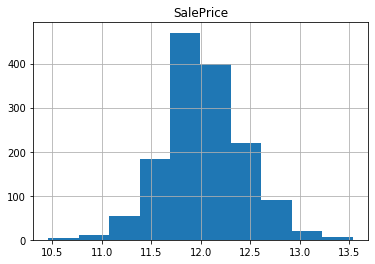

In [44]:
for feat in continousFeatures:
    if 0 in df3[feat].unique():
        pass
    else:
        df3[feat] = np.log(df3[feat])
        df3[feat].hist()
        plt.title(feat)
        plt.show()

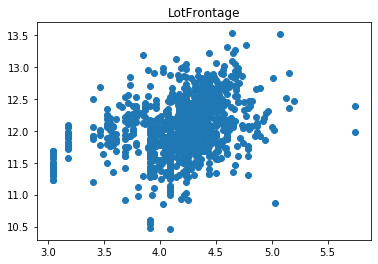

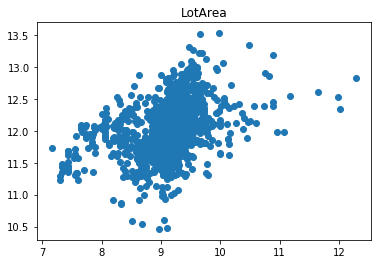

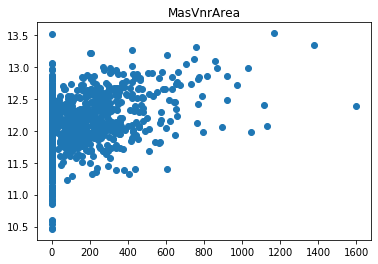

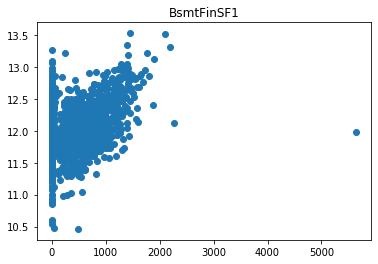

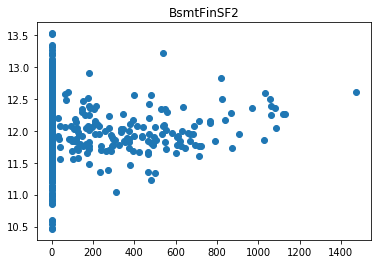

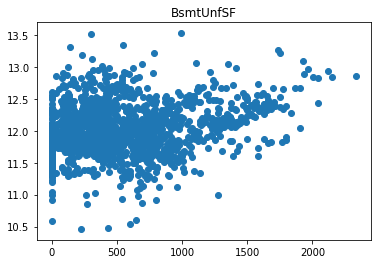

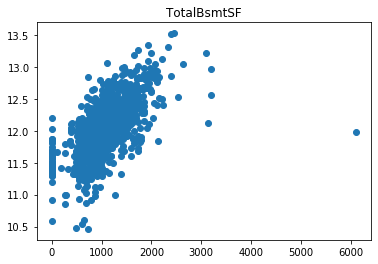

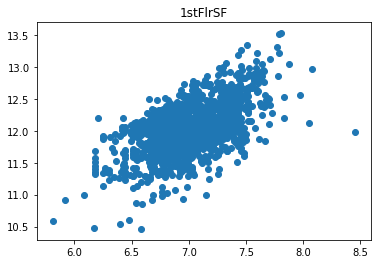

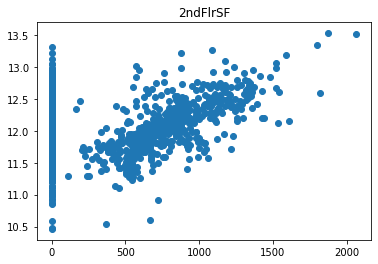

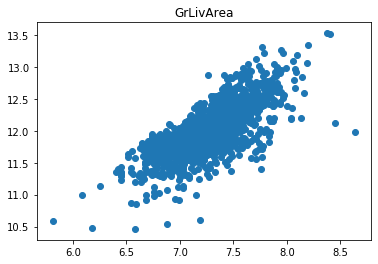

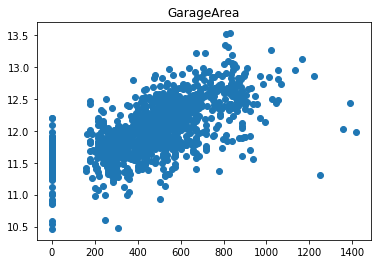

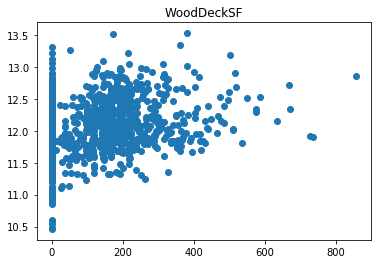

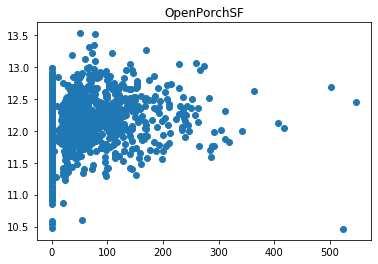

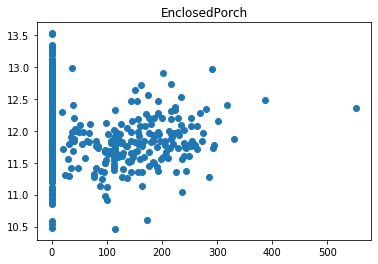

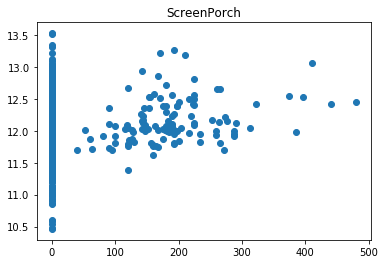

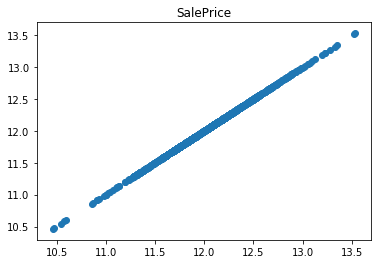

In [45]:
for feat in continousFeatures:
    plt.scatter(df3[feat],df3['SalePrice'])
    plt.title(feat)
    plt.show()

In [46]:
df[continousFeatures] = df3[continousFeatures]
# Now that the transformation is done, we save the changes to the original dataframe